# PM4

October 5th, 2020 <br/>Hannah Kim

Get collected data from other notebooks.

In [1]:
%store -r publishersT
%store -r allArticles

Import necessary modules.

In [164]:
import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
pyLDAvis.enable_notebook()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
allArticles[2]

{'link': 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=032&aid=0003030253',
 'title': '하태경 “의사-간호사 이간질 택한 문 대통령”',
 'datetime': datetime.datetime(2020, 9, 2, 17, 34),
 'num_comments': 150,
 'content': '하태경 국민의힘 의원이 지난달 26일 국회 회의를 주재하고 있다.   하태경 국민의힘(옛 미래통합당) 의원이 2일 문재인 대통령의 ‘간호사 격려’ 글에 “의사와 간호사 이간질시키는 문재인 대통령은 대통령이기를 포기하신 건가”라고 말했다  하 의원은 자신의 사회관계망서비스에서 이날 문 대통령의 메시지를 두고 “국민 이간질 해도해도 너무한다”면서 “의사와 간호사의 패싸움 하는 걸 조장하고 있다”고 말했다  그는 이어 “아무리 의사파업 중이라 해도 대통령이라면 절대 해서는 안될 행동”이라며 “해결책을 제시하지 못할망정 고생하는 간호사들을 부추겨 의사와 대결구도를 만들고 있으니 대통령이기를 포기하신 건지 되묻고 싶다”고 말했다  하 의원은 “문 대통령의 게시글을 본 국민 상당수가 두 눈을 의심할 정도”라며 “지금 대통령이 할 일은 더불어민주당이 약속한 의대증원 원점 재논의 명문화를 지시해 의사들을 즉각 병원에 복귀시키는 것”이라고 말했다  문 대통령은 이날 사회관계망서비스에 “전공의 등 의사들이 떠난 의료현장을 묵묵히 지키고 있는 간호사분들을 위로하며 헌신과 노고에 깊은 감사와 존경의 마음을 드린다”고 밝혔다  김은혜 국민의힘 대변인도 구두 논평을 통해 “(문 대통령의 메시지가) 의료진으로 표현되지만 대부분이 간호사였다. 대통령이 국민을 상대로 좌표를 찍었다”면서 “의사를 향한 대리전을 간호사들에 명하신 건가. 다음은 누구를 적으로 돌릴 셈인가”라고 말했다',
 'reactions': {'good': 344, 'warm': 4, 'sad': 1, 'angry': 45, 'w

# KoNLPy

Make a list of article content with only meaningful words, contentWithValidTags. This was done using konlpy, a module for natural language processing of the Korean language.

In [62]:
okt = Okt()

contentWithValidTags = []
validTags = ['Noun', 'Verb', 'Adjective', 'Foreign', 'Alpha']

for aDict in allArticles:
    content = aDict['content']
    contentWithValidTags.append(' '.join([x[0] for x in okt.pos(content) if x[1] in validTags]))
    
len(contentWithValidTags)

1951

In [66]:
contentWithValidTags[2]

'하태경 국민 힘 의원 지난달 국회 회의 주재 있다 하태경 국민 힘 미래 통합 의원 문재인 대통령 ‘ 간호사 격려 글 “ 의사 간호사 간질 시키는 문재인 대통령 대통령 이기 포기 하신 건가 ” 말 했다 의원 자신 회관 망 서비스 날 문 대통령 메시지 두고 “ 국민 간질 해도 해도 너무한다 ” 면서 “ 의사 간호사 패싸움 하는 걸 조장 있다 ” 고 말 했다 그 이어 “ 의사 파업 중이 해도 대통령 라면 절대 해서는 안될 행동 ” 라며 “ 해결 책 제시 하지 할 망정 고생 하는 간호사 부추겨 의사 대결 구도 만들고 있으니 대통령 이기 포기 하신 건지 되 묻고 싶다 ” 고 말 했다 의원 “ 문 대통령 게시 글 본 국민 상당수 두 눈 의심 할 정도 ” 라며 “ 지금 대통령 할 일 더불어 민주당 약속 의대 증원 원점 재 논의 명문 지시 해 의사 즉각 병원 복귀 시키는 것 ” 말 했다 문 대통령 날 회관 망 서비스 “ 전공 등 의사 떠난 의료 현장 묵묵히 지키고 있는 간호사 위로 하며 헌신 노고 깊은 감사 존경 마음 드린다 ” 고 밝혔다 김은혜 국민 힘 대변인 구두 논평 통해 “ 문 대통령 메시지 의료 진 표현 되지만 대부분 간호사 였다 대통령 국민 상대로 좌표 찍었다 ” 면서 “ 의사 향 대리전 간호사 명 하신 건가 다음 누구 적 돌릴 셈 ” 말 했다'

# TF and TF-IDF Vectorizers

## TF Vectorizer

In [82]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                min_df = 0,
                                max_df = 1,
                                ngram_range = (1,3))

dtm_tf = tf_vectorizer.fit_transform(contentWithValidTags)
dtm_tf.shape

(1951, 523011)

In [85]:
tf_vectorizer.get_feature_names()[300000:300050]

['완화 해야',
 '완화 해야 국민',
 '왈가 왈부 하기',
 '왈가 왈부 하기가',
 '왈부 하기',
 '왈부 하기 어려운',
 '왈부 하기가',
 '왈부 하기가 어려운',
 '왈짜들',
 '왈짜들 하는',
 '왈짜들 하는 행패',
 '왔고 가족',
 '왔고 가족 떨어져',
 '왔고 오는',
 '왔고 오는 유도',
 '왔고 지역',
 '왔고 지역 의료',
 '왔기',
 '왔기 때문',
 '왔기 때문 지난',
 '왔는데 눈물',
 '왔는데 눈물 나더라고',
 '왔는데 담당',
 '왔는데 담당 의사',
 '왔는데 수술 예약',
 '왔는데 어떤',
 '왔는데 어떤 보상',
 '왔는데 여기',
 '왔는데 여기 닫았다',
 '왔는데 예상',
 '왔는데 예상 달리',
 '왔는데 예정',
 '왔는데 예정 진료',
 '왔는데 오늘',
 '왔는데 오늘 진인',
 '왔는데 이',
 '왔는데 이 업무',
 '왔는데 이번',
 '왔는데 이번 코로나',
 '왔는데요',
 '왔는데요 현재',
 '왔는데요 현재 대만',
 '왔다 갔다',
 '왔다 갔다 하는',
 '왔다 고 덧붙였다',
 '왔다 고 말',
 '왔다 고 비판',
 '왔다 고 했다',
 '왔다 교수',


## TF-IDF Vectorizer

In [88]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(contentWithValidTags)
dtm_tfidf.shape

(1951, 523011)

# Topic Modeling

## Latent Dirichlet Allocation Models

In [91]:
# TF DTM
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tf.fit(dtm_tf)

# TF-IDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(random_state=0)

## pyLDAvis for Visualization

### TF Model

In [119]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.178822 -0.033842       1        1  12.864769
2     -0.058974 -0.162656       2        1  11.394021
6     -0.022639  0.045120       3        1  10.276576
7     -0.021001  0.038584       4        1  10.176800
3     -0.021121  0.039228       5        1  10.175445
0     -0.014372  0.020702       6        1   9.549359
4     -0.014184  0.020306       7        1   9.525069
5     -0.009794  0.012248       8        1   8.882041
8     -0.009679  0.012071       9        1   8.857874
9     -0.007059  0.008239      10        1   8.298047, topic_info=                          Term      Freq     Total Category  logprob  loglift
36926                  고양이  9.000000  9.000000  Default   30.000  30.0000
300301             왕진 의료  8.000000  8.000000  Default   29.000  29.0000
307490                   월세  6.000000  6.000000  Default   28.000  28.0000
288745                   여인  6.000000  6.000000  Default   27.000  27.0000
241514                    소녀  6.000000  6.000000  Default   26.000  26.0000
...                        ...       ...       ...      ...      ...      ...
54302           권 애 변호사  1.418536  1.874934  Topic10  -10.345   2.2102
54301                   권 애  1.418536  1.874934  Topic10  -10.345   2.2102
314038              율 회계사  1.418536  1.874934  Topic10  -10.345   2.2102
94002   단국대 교수 강양구  1.418536  1.874934  Topic10  -10.345   2.2102
46573            교수 강양구  1.418536  1.874934  Topic10  -10.345   2.2102

[354 rows x 6 columns], token_table=        Topic      Freq              Term
term                                     
78          2  0.936743                bt
331         6  0.867545                id
475        10  0.923727               ktv
488        10  0.857439          la 지역
593         4  0.788718               nhs
...       ...       ...               ...
510464     10  0.857439        호프스태터
512030      1  0.890804  확 진자 일일
522025     10  0.533352           희소성
522981      8  0.519272          醫政 협의
522982      8  0.519272       醫政 협의 체

[324 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 7, 8, 4, 1, 5, 6, 9, 10])

### TF-IDF Model

In [120]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.004696  0.000222       1        1  11.742007
2      0.000904 -0.002102       2        1  10.608408
4      0.001060  0.003993       3        1  10.339288
8      0.000798 -0.001212       4        1  10.148060
3      0.000501 -0.000286       5        1  10.012843
7      0.000355 -0.000158       6        1   9.805262
9      0.000282 -0.000118       7        1   9.458421
5      0.000320 -0.000147       8        1   9.321681
6      0.000242 -0.000098       9        1   9.310590
0      0.000233 -0.000094      10        1   9.253439, topic_info=                                  Term      Freq     Total Category  logprob  \
410052      지난 대한의사협회 비롯  0.000000  0.000000  Default  30.0000   
469074           하기 위해 학창시절  0.000000  0.000000  Default  29.0000   
188841                   방침 이 중  0.000000  0.000000  Default  28.0000   
369691              장관 정부 내달  0.000000  0.000000  Default  27.0000   
392871               제공 정부 내달  0.000000  0.000000  Default  26.0000   
...                                ...       ...       ...      ...      ...   
176824              바로 여러분 했다  0.015971  0.062401  Topic10 -12.0047   
461260  페이스북 여러분 아니었으면  0.015971  0.062401  Topic10 -12.0047   
287478               여러분 했다 홍  0.015971  0.062401  Topic10 -12.0047   
287477                   여러분 했다  0.015971  0.062401  Topic10 -12.0047   
152745                말 했다 일단  0.015971  0.062401  Topic10 -12.0047   

        loglift  
410052  30.0000  
469074  29.0000  
188841  28.0000  
369691  27.0000  
392871  26.0000  
...         ...  
176824   1.0174  
461260   1.0174  
287478   1.0174  
287477   1.0174  
152745   1.0174  

[362 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 9, 4, 8, 10, 6, 7, 1])

### Probabilities for the TF-IDF Model

In [153]:
probabilities_tfidf = lda_tfidf.transform(dtm_tfidf)
probabilities_tfidf[0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.00222478, 0.00222478, 0.97997698, 0.00222478, 0.00222478,
       0.00222478, 0.00222478, 0.00222478, 0.00222478, 0.00222478])

I will examine the distribution of the highest-probability topics for each article for all publishers.

In [221]:
def distrTopics(pList, publisher):
    """
    pList is the list of probabilities for an LDA model.
    publisher is the target publisher in which we are interested.
    distrTopics() will return a list where each index corresponds to each topic
    and each value is the number of articles for that topic.
    This function is only valid for models with 10 topics.
    The items in pList must align with those in allArticles.
    """
    
    result = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in range(len(allArticles)):
        aDict = allArticles[i]
        if aDict['publisher'] == publisher:
            # Get topic (index) with highest probability
            maxP = 0
            maxIndex = 0
            for j in range(len(pList[i])):
                maxP = max(maxP, pList[i][j])
                if maxP == pList[i][j]:
                    maxIndex = j
            result[maxIndex] += 1
            
    return result

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [222]:
probabilities_all_publishers = []

for pbls in publishersT:
    probabilities_all_publishers.append(distrTopics(probabilities_tfidf, pbls))
    
publishersT

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['경향신문', '국민일보', '동아일보', '문화일보', '서울신문', '세계일보', '조선일보', '중앙일보', '한겨레', '한국일보']

In [188]:
max([max(x) for x in probabilities_all_publishers])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


47

### Graphs

In [209]:
translate = {
    '경향신문': 'Kyunghyang Shinmun',
    '국민일보': 'Kukmin Ilbo',
    '동아일보': 'DongA Ilbo',
    '문화일보': 'Munhwa Ilbo',
    '서울신문': 'Seoul Shinmun',
    '세계일보': 'Segye Ilbo',
    '조선일보': 'Chosun Ilbo',
    '중앙일보': 'JoongAng Ilbo',
    '한겨레': 'Hangyoreh',
    '한국일보': 'Hankuk Ilbo'
}

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [223]:
def barDistr(xt, yt, unit, publisher):
    """
    xt is a list of ticks for the x axis.
    yt is a list of ticks for the y axis.
    unit is a string for display in the y axis.
    publisher is the publisher in which we are interested.
    barDistr will display a plot of distribution of topics 
    for the articles by the publisher.
    The publisher must be one that is in the list publishersT.
    """

    plt.figure()
    plt.subplot()
    plt.bar(xt, probabilities_all_publishers[publishersT.index(publisher)])
    plt.title('Distribution of Topics for {}'.format(translate[publisher]))
    plt.xlabel('Topics')
    plt.ylabel('Number of {}'.format(unit))
    plt.xticks(xt)
    plt.yticks(yt)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


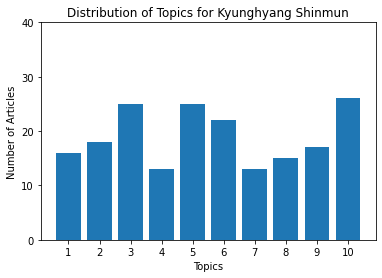

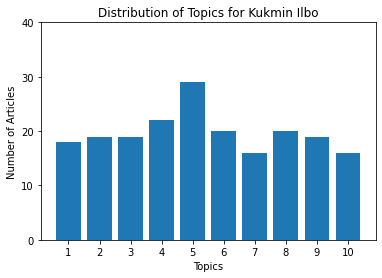

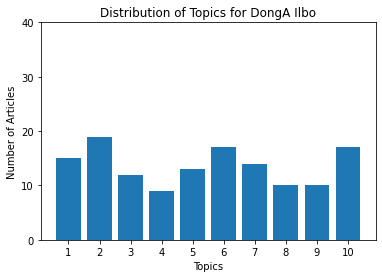

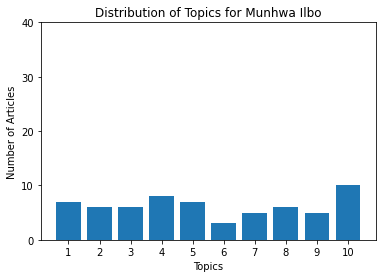

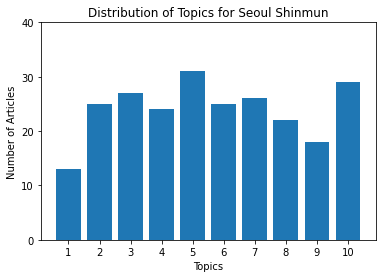

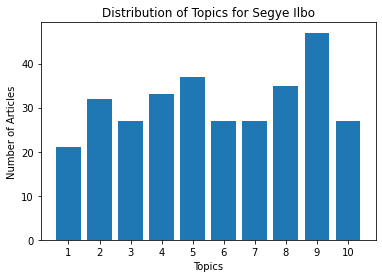

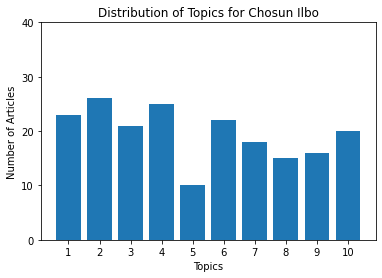

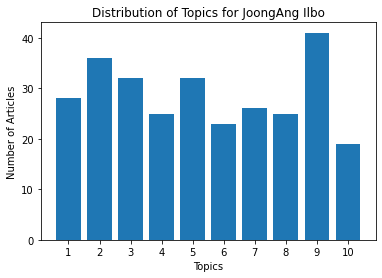

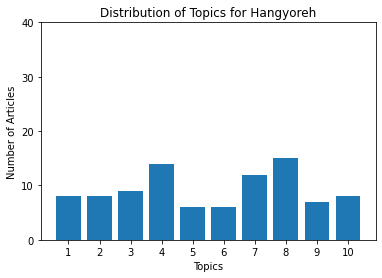

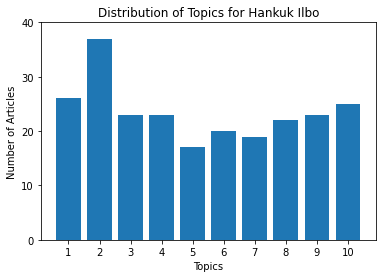

In [217]:
for p in publishersT:
    barDistr(range(1,11), range(0,50,10), 'Articles', p)

# Topic Modeling - Titles

## Create list of titles

In [200]:
allTitles = []

for aDict in allArticles:
    allTitles.append(aDict['title'])
    
len(contentWithValidTags)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1951

## Vectorizers

In [204]:
tf_vectorizer_titles = CountVectorizer(strip_accents = 'unicode',
                                min_df = 0,
                                max_df = 1,
                                ngram_range = (1,3))

dtm_tf_titles = tf_vectorizer_titles.fit_transform(allTitles)
dtm_tf_titles.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1951, 24772)

In [203]:
tf_vectorizer_titles.get_feature_names()[:100]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['10 공공의료가',
 '10 공공의료가 코로나',
 '10 의협',
 '10 의협 정부',
 '10 최대집',
 '10 최대집 의협',
 '100',
 '100 50건',
 '100 50건 점점',
 '1000명당',
 '1000명당 의사',
 '1000명당 의사 3명',
 '100건 미뤄',
 '100건 미뤄 응급실',
 '100건 서울대병원',
 '100건 서울대병원 초진',
 '100명',
 '100명 넘어서',
 '100명 넘어서 병상ᆞ인력부족',
 '100여건',
 '100여건 연기',
 '100여건 연기 병원마다',
 '10곳',
 '10곳 중',
 '10곳 중 1곳만',
 '10년 의무복무',
 '10년 의무복무 지역의사',
 '10년 지나면',
 '10년 지나면 수도권으로',
 '10년간 3000명',
 '10년간 3000명 투입',
 '10년간 4000명 더',
 '10년간 의대정원',
 '10년간 의대정원 매년',
 '10명 고발 정부에',
 '10명 고발 철회',
 '10명 단',
 '10명 단 한명의',
 '10명 이야기',
 '10명 이야기 들어보니',
 '10명 중 9명',
 '10명 중 9명이',
 '10문10답',
 '10문10답 의협',
 '10문10답 의협 등',
 '10시부터',
 '10시부터 전공의',
 '10시부터 전공의 ᄌ

In [205]:
tfidf_vectorizer_titles = TfidfVectorizer(**tf_vectorizer_titles.get_params())
dtm_tfidf_titles = tfidf_vectorizer_titles.fit_transform(allTitles)
dtm_tfidf_titles.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1799: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


(1951, 24772)

## LDA Models

In [206]:
# TF DTM
lda_tf_titles = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tf_titles.fit(dtm_tf_titles)

# TF-IDF DTM
lda_tfidf_titles = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf_titles.fit(dtm_tfidf_titles)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(random_state=0)

In [207]:
pyLDAvis.sklearn.prepare(lda_tf_titles, dtm_tf_titles, tf_vectorizer_titles)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.163318 -0.017576       1        1  10.957564
0      0.057560 -0.136400       2        1  10.673983
6      0.039809  0.111040       3        1  10.548045
2      0.019982  0.016238       4        1  10.329655
8      0.012773  0.008255       5        1  10.056446
1      0.009349  0.005503       6        1   9.846612
5      0.007061  0.003923       7        1   9.584739
4      0.006061  0.003286       8        1   9.443675
9      0.006030  0.003267       9        1   9.404551
7      0.004693  0.002463      10        1   9.154730, topic_info=                         Term      Freq     Total Category  logprob  loglift
20938                  최고위  1.000000  1.000000  Default   30.000   30.000
22953                    하다  1.000000  1.000000  Default   29.000   29.000
12095                   야권  1.000000  1.000000  Default   28.000   28.000
10362           서울시의사회  1.000000  1.000000  Default   27.000   27.000
4210                 끝내는  1.000000  1.000000  Default   26.000   26.000
...                       ...       ...       ...      ...      ...      ...
8745   보건의료 정책 논의  0.527147  0.978858  Topic10   -8.367    1.772
18564       정책 논의 기구  0.527147  0.978858  Topic10   -8.367    1.772
18563            정책 논의  0.527147  0.978858  Topic10   -8.367    1.772
18169      정부 의료계 소통  0.527147  0.978858  Topic10   -8.367    1.772
4767               논의 기구  0.527147  0.978858  Topic10   -8.367    1.772

[432 rows x 6 columns], token_table=       Topic      Freq                       Term
term                                             
84         4  0.992628                   14년간
85         4  0.992628            14년간 꽁꽁
86         4  0.992628  14년간 꽁꽁 묶었던
131        2  0.984883                   16년간
132        2  0.984883     16년간 어린이병원
...      ...       ...                        ...
24481      9  1.015683           휴진해 환자들
24482      9  1.015683    휴진해 환자들 골탕
24495      5  0.999244                      흙과
24496      5  0.999244               흙과 나무와
24497      5  0.999244          흙과 나무와 가마

[402 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 7, 3, 9, 2, 6, 5, 10, 8])

In [208]:
pyLDAvis.sklearn.prepare(lda_tfidf_titles, dtm_tfidf_titles, tfidf_vectorizer_titles)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.046848 -0.008550       1        1  11.076095
0     -0.017279 -0.041016       2        1  10.803236
8     -0.008785  0.024971       3        1  10.514489
6     -0.004920  0.006952       4        1  10.048420
7     -0.003945  0.004881       5        1   9.982009
5     -0.003452  0.004018       6        1   9.913815
9     -0.003263  0.003726       7        1   9.786247
2     -0.002140  0.002143       8        1   9.522577
3     -0.001902  0.001852       9        1   9.500342
4     -0.001161  0.001023      10        1   8.852771, topic_info=                               Term      Freq     Total Category  logprob  \
23135            한마당 초엘리트  0.000000  0.000000  Default  30.0000   
10746           속보 정부 의대생  0.000000  0.000000  Default  29.0000   
19795          진료거부 중단하라  0.000000  0.000000  Default  28.0000   
20805  총파업 대비 비상진료체계  0.000000  0.000000  Default  27.0000   
7979             박능후 오전 8시  0.000000  0.000000  Default  26.0000   
...                             ...       ...       ...      ...      ...   
1766             강행 진료 차질  0.117899  0.313295  Topic10  -8.5372   
10862                수도권 중심  0.117899  0.313295  Topic10  -8.5372   
19196           중심 재유행 의사  0.117899  0.313295  Topic10  -8.5372   
19195                중심 재유행  0.117899  0.313295  Topic10  -8.5372   
10863        수도권 중심 재유행  0.117899  0.313295  Topic10  -8.5372   

       loglift  
23135  30.0000  
10746  29.0000  
19795  28.0000  
20805  27.0000  
7979   26.0000  
...        ...  
1766    1.4471  
10862   1.4471  
19196   1.4471  
19195   1.4471  
10863   1.4471  

[415 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 9, 7, 8, 6, 10, 3, 4, 5])

## Graph of Topic Distributions

In [218]:
probabilities_tfidf_titles = lda_tfidf_titles.transform(dtm_tfidf_titles)
probabilities_tfidf_titles[0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.02316625, 0.02316625, 0.02316625, 0.02316625, 0.02316625,
       0.02316625, 0.02316625, 0.02316625, 0.79150374, 0.02316625])

In [224]:
probabilities_all_publishers_titles = []

for pbls in publishersT:
    probabilities_all_publishers_titles.append(distrTopics(probabilities_tfidf_titles, pbls))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
max([max(x) for x in probabilities_all_publishers_titles])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


41

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


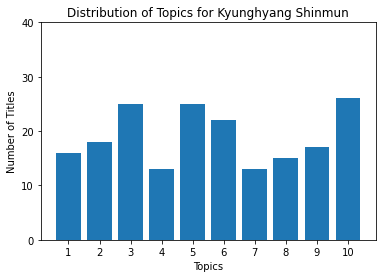

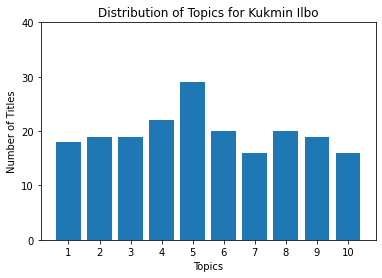

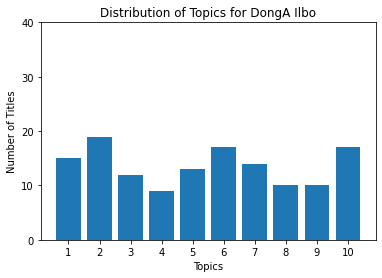

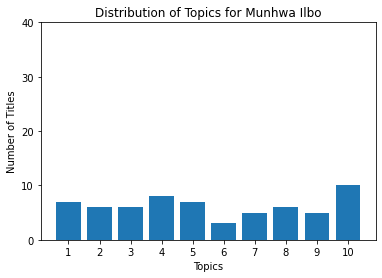

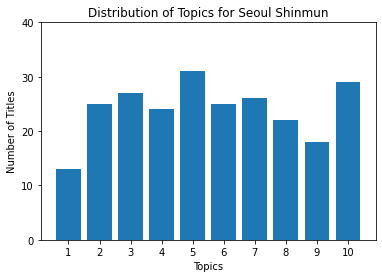

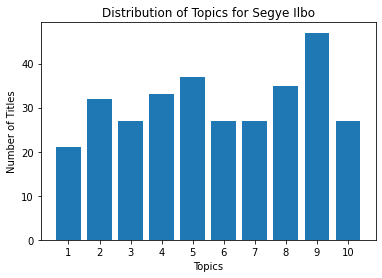

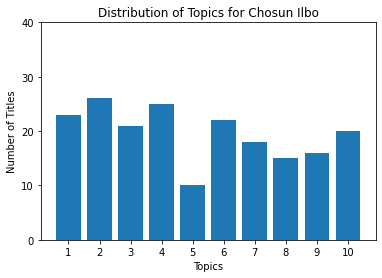

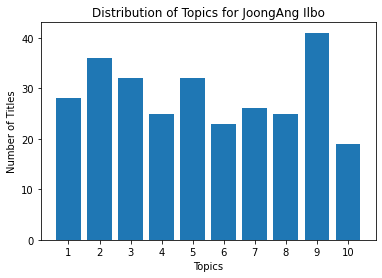

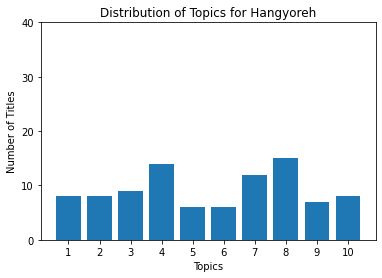

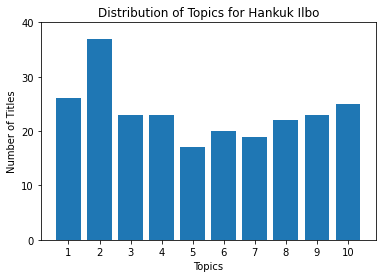

In [226]:
for p in publishersT:
    barDistr(range(1,11), range(0,45,10), 'Titles', p)